# Data Understanding Notebook

This notebook helps us understand the raw dataset before any cleaning or transformation. We’ll explore the schema, data types, missing values, basic distributions, and relationships.


In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Append the src folder to the path for module access if needed
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

# Import loader function
from data_loader import load_data

# Define the raw data path
RAW_PATH = "../data/raw/MachineLearningRating_v3.txt"

# Load the data
df = load_data(RAW_PATH)

# Display the first few rows
df.head()


c:\Users\tsion\insurance-risk-analytics\src\data_loader.py:9: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='|', encoding='utf-8')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


## 1. Dataset Shape & Schema

Let's check how many rows and columns we have, along with column names and types.


In [2]:
print("Shape:", df.shape)
df.info()


Shape: (1000098, 52)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Provin

## 2. Statistical Summary of Numeric Columns

Review basic stats like mean, median, extremes to understand variable distributions.


In [3]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
UnderwrittenCoverID,1000098.0,1.048175e+05,6.329371e+04,1.000000e+00,5.514300e+04,9.408300e+04,1.391900e+05,3.011750e+05
PolicyID,1000098.0,7.956682e+03,5.290039e+03,1.400000e+01,4.500000e+03,7.071000e+03,1.107700e+04,2.324600e+04
PostalCode,1000098.0,3.020601e+03,2.649854e+03,1.000000e+00,8.270000e+02,2.000000e+03,4.180000e+03,9.870000e+03
mmcode,999546.0,5.487770e+07,1.360381e+07,4.041200e+06,6.005692e+07,6.005842e+07,6.005842e+07,6.506535e+07
RegistrationYear,1000098.0,2.010225e+03,3.261391e+00,1.987000e+03,2.008000e+03,2.011000e+03,2.013000e+03,2.015000e+03
Cylinders,999546.0,4.046642e+00,2.940201e-01,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,1.000000e+01
cubiccapacity,999546.0,2.466743e+03,4.428006e+02,0.000000e+00,2.237000e+03,2.694000e+03,2.694000e+03,1.288000e+04
kilowatts,999546.0,9.720792e+01,1.939326e+01,0.000000e+00,7.500000e+01,1.110000e+02,1.110000e+02,3.090000e+02
NumberOfDoors,999546.0,4.019250e+00,4.683144e-01,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.000000e+00
CustomValueEstimate,220456.0,2.255311e+05,5.645157e+05,2.000000e+04,1.350000e+05,2.200000e+05,2.800000e+05,2.655000e+07


## 3. Missing Values Analysis

Calculate and visualize missing data percentages per column.


In [4]:
missing = df.isna().mean().sort_values(ascending=False)
missing_df = pd.DataFrame({'MissingPct': (missing * 100).round(2)})
missing_df.head(10)


,MissingPct
NumberOfVehiclesInFleet,100.00
CrossBorder,99.93
CustomValueEstimate,77.96
Rebuilt,64.18
Converted,64.18
WrittenOff,64.18
NewVehicle,15.33
Bank,14.59
AccountType,4.02
Gender,0.95


C:\Users\tsion\AppData\Local\Temp\ipykernel_17180\3266750929.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MissingPct', y=missing_df.index, data=missing_df, palette="viridis")


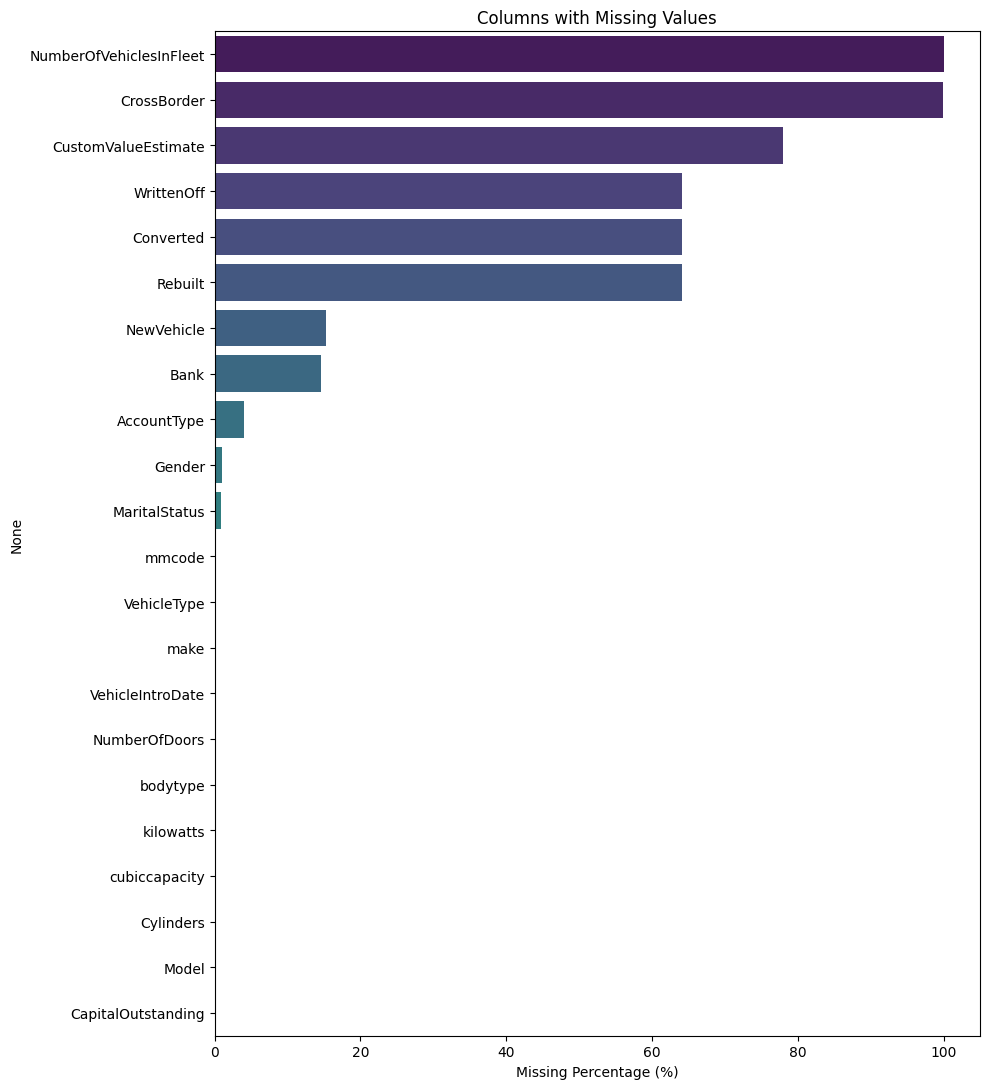

In [6]:
# Filter to columns with missing values only
missing = df.isna().mean()
missing = missing[missing > 0].sort_values(ascending=False)

# Convert to DataFrame for labeling
missing_df = pd.DataFrame({'MissingPct': (missing * 100).round(2)})

# Plot
plt.figure(figsize=(10, len(missing_df) * 0.5))  # Dynamically scale height
sns.barplot(x='MissingPct', y=missing_df.index, data=missing_df, palette="viridis")
plt.xlabel('Missing Percentage (%)')
plt.title('Columns with Missing Values')
plt.tight_layout()
plt.show()


## 4. Top Categories in Categorical Columns

Let's look at value counts for key categorical columns to see cardinals and rare categories.


In [7]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols[:5]:  # Inspect first 5 columns
    print(f"--- {col} ---")
    print(df[col].value_counts(dropna=False).head(10), "\n")


--- TransactionMonth ---
TransactionMonth
2015-08-01 00:00:00    106747
2015-07-01 00:00:00    104143
2015-06-01 00:00:00    102594
2015-05-01 00:00:00     99898
2015-04-01 00:00:00     96563
2015-03-01 00:00:00     92015
2015-02-01 00:00:00     83198
2015-01-01 00:00:00     71576
2014-12-01 00:00:00     62457
2014-11-01 00:00:00     48248
Name: count, dtype: int64 

--- Citizenship ---
Citizenship
      895210
ZA    103721
ZW       936
AF       231
Name: count, dtype: int64 

--- LegalType ---
LegalType
Individual           911929
Private company       83891
Close Corporation      2459
Public company         1295
Partnership             331
Sole proprieter         193
Name: count, dtype: int64 

--- Title ---
Title
Mr      933555
Mrs      45850
Ms       13269
Miss      6614
Dr         810
Name: count, dtype: int64 

--- Language ---
Language
English    1000098
Name: count, dtype: int64 



## 5. Temporal Distribution (Transaction Month)

Let's inspect the time span and frequency of our data entries.


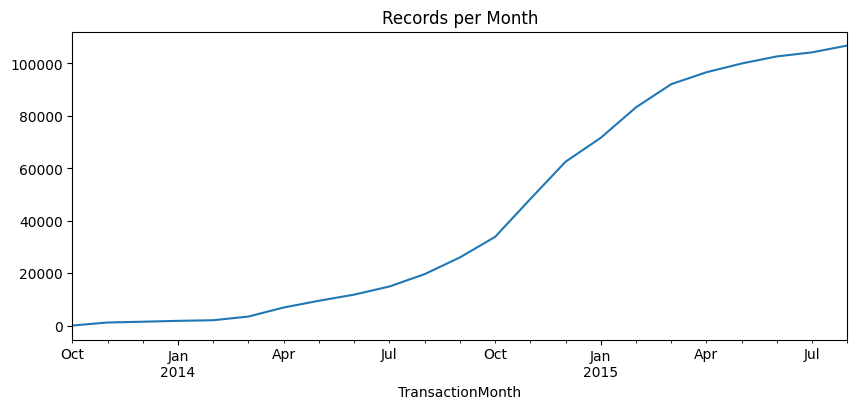

In [8]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
df['TransactionMonth'].describe()
df['TransactionMonth'].dt.to_period('M').value_counts().sort_index().plot(kind='line', figsize=(10, 4))
plt.title('Records per Month')
plt.show()


## 6. Correlation Among Numeric Features

Explore linear relationships between numeric columns.


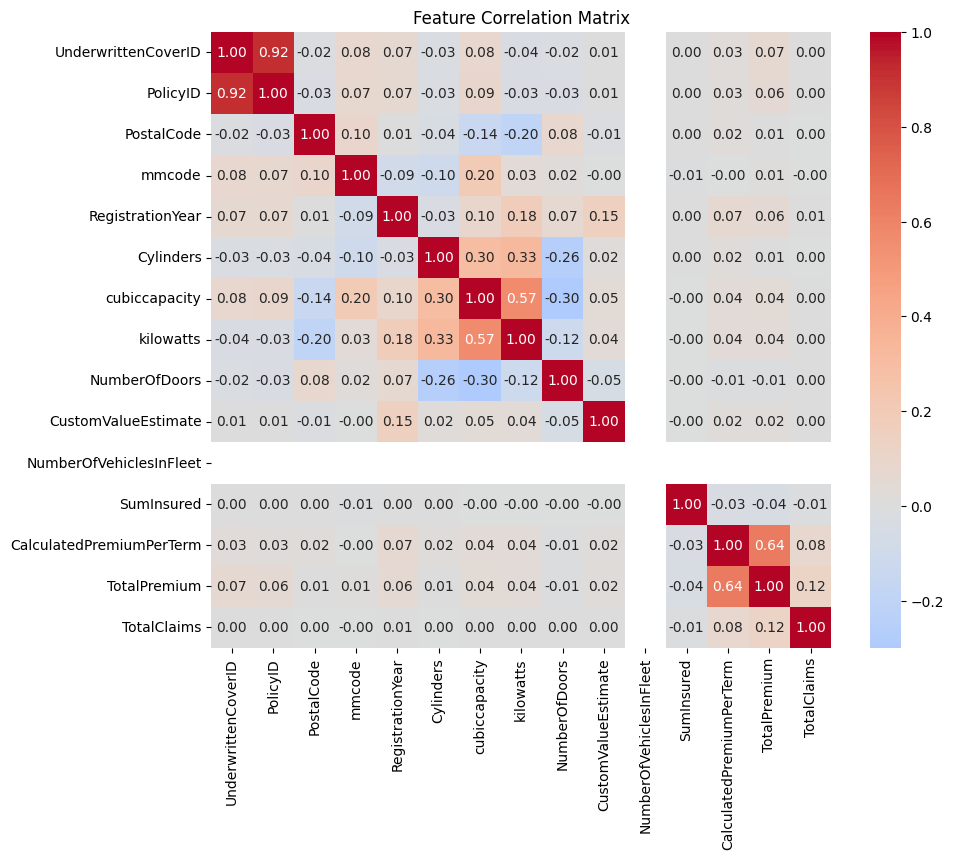

In [9]:
num_cols = df.select_dtypes(include=['int64', 'float64'])
corr = num_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title('Feature Correlation Matrix')
plt.show()


## 🔍 Observations & Next Steps

- Dataset shape: (1000098, 52)
- Key columns with missing values:NumberOfVehiclesInFleet	100.00 %
    CrossBorder	99.93%
    CustomValueEstimate	77.96%
    Rebuilt	64.18%
    Converted	64.18%
    WrittenOff	64.18%
- Date span: oct 2014-jul 2015
- Notable correlations: there is a strong correletion between clculated premium per term and total premium the aaothers are slight correlation
- Things to focus on in the cleaning phase: 	
  - Handle high-missing columns: ('NumberOfVehiclesInFleet', 'CrossBorder', 'CustomValueEstimate',	'Rebuilt',	'Converted',	'WrittenOff')
  - Normalize data types (especially `ItemType`, `PolicyID`, `TransactionMonth`)
 
  - Investigate outliers.
